CSV contains following fields:
 ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']


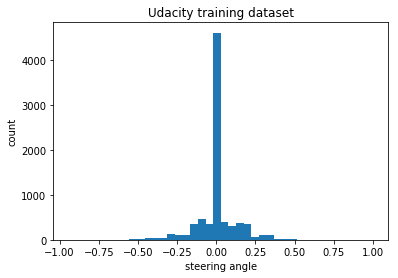

In [20]:
"""The script used to create and train the model."""
from scipy.misc import imread
from sklearn.model_selection import train_test_split

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import logging
import csv
import os

%matplotlib inline

# Inspect training data
image_urls = []
left_urls = []
right_urls = []
angles = []
with open('./data/driving_log.csv', 'r') as f:
    csv_reader = csv.reader(f, skipinitialspace=True)
    headers = next(csv_reader)
    print('CSV contains following fields:\n', headers)
    for row in csv_reader:
        (img_center, img_left, img_right,
         angle, throttle, break_, speed,) = row
        # TODO(Olala): use data from multiple cameras
        image_urls.append(img_center)
        left_urls.append(img_left)
        right_urls.append(img_right)
        angles.append(angle)

    image_urls = np.array(image_urls)
    angles = np.array(angles).astype(np.float32)

# draw histogram
plt.hist(angles, bins=40)
plt.title('Udacity training dataset')
plt.ylabel('count')
plt.xlabel('steering angle')
plt.show()


left xxxIMG/left_2016_12_01_13_33_56_505.jpgxxx


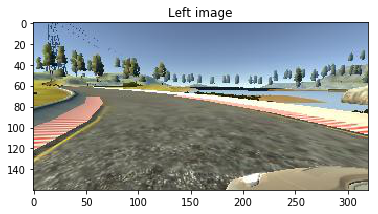

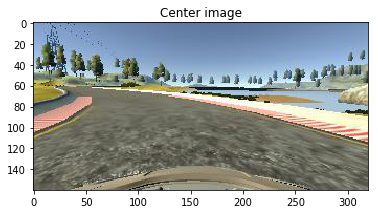

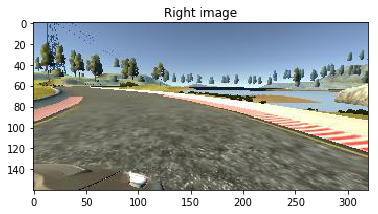

In [21]:
import random

rand_index = random.randint(0, image_urls.shape[0])
center_img_path = image_urls[rand_index]
left_img_path = left_urls[rand_index]
right_img_path = right_urls[rand_index]

# display left image
print('left xxx%sxxx'% left_img_path)
abs_path = os.path.join(os.getcwd(), 'data', left_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Left image')
plt.show()

# display center image
abs_path = os.path.join(os.getcwd(), 'data', center_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Center image')
plt.show()

# display right image
abs_path = os.path.join(os.getcwd(), 'data', right_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Right image')
plt.show()


image: (160, 320, 3)


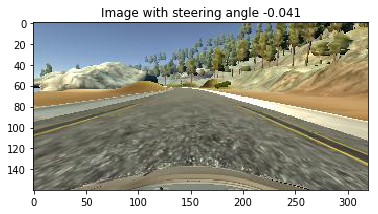

crop_img (80, 320, 3)


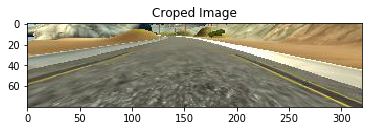

new_img (40, 160, 3)


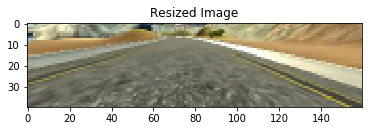

In [32]:
import random

rand_index = random.randint(0, image_urls.shape[0])
rel_path = image_urls[rand_index]
angle = angles[rand_index]
abs_path = os.path.join(os.getcwd(), 'data', rel_path)
img = mpimg.imread(abs_path)
print('image:', img.shape)
plt.imshow(img)
plt.title('Image with steering angle %.3f' % angle)
plt.show()

crop_img = img[50:130, 0:320]
print('crop_img', crop_img.shape)
plt.imshow(crop_img)
plt.title('Croped Image')
plt.show()

new_img = cv2.resize(crop_img, (160, 40))
print('new_img', new_img.shape)
plt.imshow(new_img)
plt.title('Resized Image')
plt.show()


In [14]:
# Corp and resize image for less training time